# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv("admissions.csv")

In [4]:
# Automated program :- Missing Values for each COLUMN
column_list = df.columns
non_null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()<1] 
for attribute in non_null_column_values:
    print(attribute,':' ,np.round(df[attribute].isnull().sum().mean(), 4),'% missing values')
print('\n')
print('non null columns', non_null_column_values) 
print('\n')
null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()>1 ] 
print('NULL COLUMNS == ', null_column_values)

print('Columns with NO NULL Values== ', len(non_null_column_values))
print('Columns with NULL values ==', len(null_column_values))

Serial No. : 0.0 % missing values
GRE Score : 0.0 % missing values
TOEFL Score : 0.0 % missing values
University Rating : 0.0 % missing values
SOP : 0.0 % missing values
LOR  : 0.0 % missing values
CGPA : 0.0 % missing values
Research : 0.0 % missing values
Chance of Admit  : 0.0 % missing values


non null columns ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


NULL COLUMNS ==  []
Columns with NO NULL Values==  9
Columns with NULL values == 0


In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.rename(columns = {'Chance of Admit':'prob_admit'},inplace = True)

In [7]:
df = df.drop(['Serial No.'],axis =1)

## Setting the Admission Criteria

In [8]:
df.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [9]:
df.groupby('University Rating').quantile(0.75)

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,312.0,101.75,2.375,3.0,8.01,1.0,0.6075
2,315.0,106.00,3.000,3.5,8.45,1.0,0.7000
3,321.0,110.00,3.500,4.0,8.78,1.0,0.7700
4,329.0,114.00,4.500,4.5,9.23,1.0,0.8900
5,334.0,117.00,5.000,5.0,9.53,1.0,0.9400


In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
df.iloc[:,7].quantile(0.75)

0.82

In [12]:
df.iloc[:,7].quantile(0.85)

0.89

Choosing the applicants with top 25% acceptance probabilities as selected. Which is 0.82 in df1
And using 0.89 as application_success_prob_threshold for top 15% applicants in df2.

### Creating Categorical Target Feature : ADMITTED 

In [13]:
df1= df.copy()
df2 = df.copy()

In [14]:
df1_index = df1[df1.iloc[:,7]>=0.82].index
df2_index = df2[df2.iloc[:,7]>=0.89].index

In [15]:
df1['admit'] = (df1.iloc[:,7] > 0.82)
df2['admit'] = df2.iloc[:,7]>0.89

In [16]:
df1.admit=df1.admit.replace(True,1)
df1.admit = df1.admit.replace(False,0)

In [17]:
df2.admit=df2.admit.replace(True,1)
df2.admit = df2.admit.replace(False,0)

In [18]:
df1.corr().iloc[:,8]

GRE Score            0.658111
TOEFL Score          0.680829
University Rating    0.631881
SOP                  0.592340
LOR                  0.510869
CGPA                 0.718600
Research             0.453058
Chance of Admit      0.729314
admit                1.000000
Name: admit, dtype: float64

#### Basic EDA plots to understand the nature of data

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>,
        <Axes: title={'center': 'admit'}>]], dtype=object)

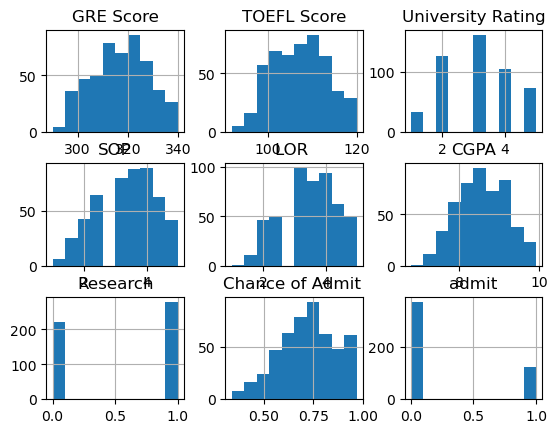

In [19]:
figsize = (1000,500)
df1.hist()

In [20]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.248000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.432284
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   admit              500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Multi-Colinearity

<Axes: >

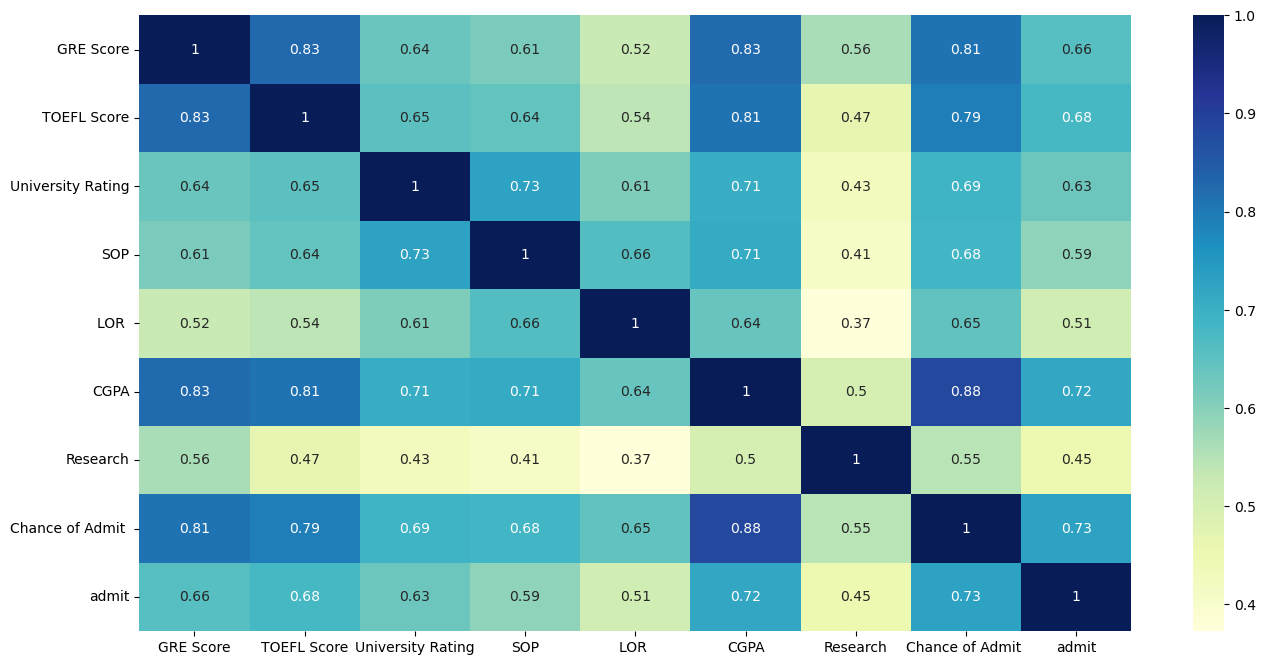

In [22]:
plt.figure(figsize = (16,8))
sns.heatmap(df1.corr(),annot = True,cmap = 'YlGnBu')

#### TARGET FEATURE is heavy correlated to CGPA ,GRE and TOEFL Scores 

#### University Wise Aplicants Important Features Graphs

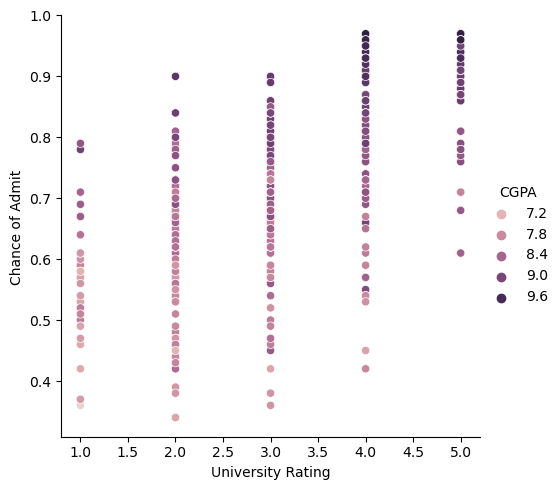

In [23]:
sns.relplot(data = df1, x='University Rating',y = df.columns[7],hue = 'CGPA')

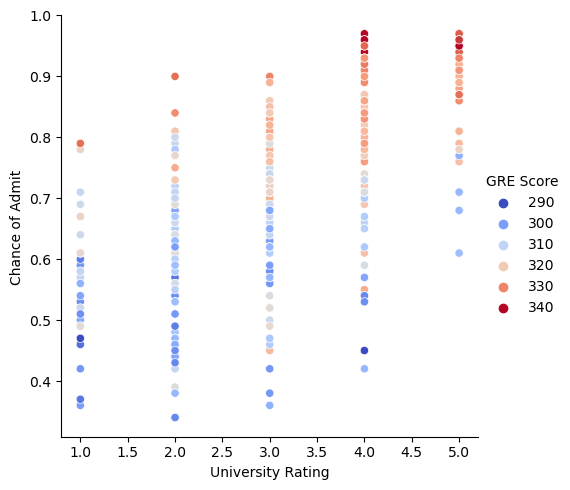

In [24]:
sns.relplot(data = df1, x='University Rating',y = df.columns[7],hue = 'GRE Score',palette = 'coolwarm')

<Axes: >

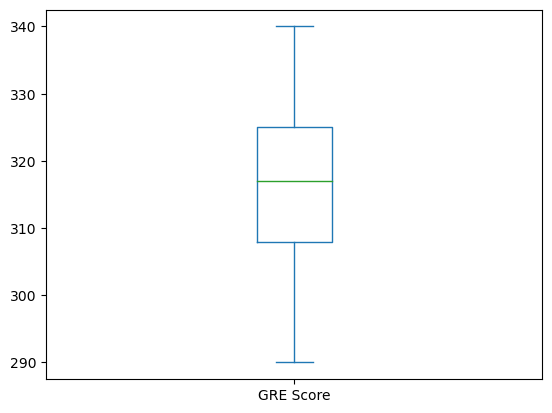

In [25]:
df1.iloc[:,0].plot(kind= 'box')

<Axes: >

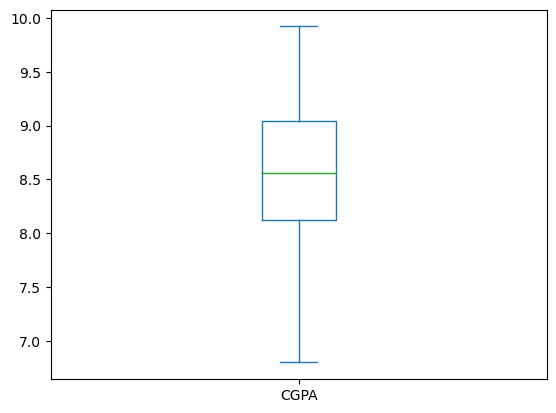

In [26]:
df1.iloc[:,5].plot(kind= 'box')

In [27]:
import scipy
# Importing library 
from scipy.stats import skew 
# Calculate the skewness 
for i in range(1,8,1):
    print('Column No \t ',i,'\t',df1.columns[i],skew(df1.iloc[:,i], axis=0, bias=True))

Column No 	  1 	 TOEFL Score 0.09531393010261811
Column No 	  2 	 University Rating 0.09002387212374935
Column No 	  3 	 SOP -0.22828490586525177
Column No 	  4 	 LOR  -0.14485407992929378
Column No 	  5 	 CGPA -0.02653261314181717
Column No 	  6 	 Research -0.24174688920761442
Column No 	  7 	 Chance of Admit  -0.28909558547899383


# Train-test Split

In [28]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,0


In [29]:
ur = df1.iloc[:,2]
re= df1.iloc[:,6]


In [30]:
df1= df1.drop(df1.columns[2],axis =1)

In [31]:
df1= df1.drop(df1.columns[5],axis =1)

In [32]:
df1=df1.join(ur)

In [33]:
df1 = df1.join(re)

In [34]:
df1

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,admit,University Rating,Research
0,337,118,4.5,4.5,9.65,0.92,1,4,1
1,324,107,4.0,4.5,8.87,0.76,0,4,1
2,316,104,3.0,3.5,8.00,0.72,0,3,1
3,322,110,3.5,2.5,8.67,0.80,0,3,1
4,314,103,2.0,3.0,8.21,0.65,0,2,0
...,...,...,...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,0.87,1,5,1
496,337,117,5.0,5.0,9.87,0.96,1,5,1
497,330,120,4.5,5.0,9.56,0.93,1,5,1
498,312,103,4.0,5.0,8.43,0.73,0,4,0


In [35]:
import sklearn 
from sklearn.model_selection import train_test_split

In [36]:
st_train_set, st_test_set = train_test_split(
    df1, test_size=0.2, random_state=42)

In [37]:
X_train = st_train_set.drop(['admit'],axis = 1)
X_test = st_test_set.drop(['admit'],axis = 1)

In [38]:
X_train

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,University Rating,Research
249,321,111,3.5,4.0,8.83,0.77,3,1
433,316,111,4.0,5.0,8.54,0.71,4,0
19,303,102,3.5,3.0,8.50,0.62,3,0
322,314,107,2.5,4.0,8.27,0.72,2,0
332,308,106,3.5,2.5,8.21,0.75,3,1
...,...,...,...,...,...,...,...,...
106,329,111,4.5,4.5,9.18,0.87,4,1
270,306,105,2.5,3.0,8.22,0.72,2,1
348,302,99,2.0,2.0,7.25,0.57,1,0
435,309,105,2.5,4.0,7.68,0.55,2,0


In [39]:
X_train = st_train_set.drop(st_train_set.columns[5],axis = 1)
X_test = st_test_set.drop(st_test_set.columns[5],axis = 1)

In [40]:
X_train= X_train.drop(['admit'],axis= 1)
X_test= X_test.drop(['admit'],axis= 1)

In [41]:
y_train= st_train_set['admit']
y_test = st_test_set['admit']

## Pandas dataframe to Numpy Arrays

In [42]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [43]:
df1

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,admit,University Rating,Research
0,337,118,4.5,4.5,9.65,0.92,1,4,1
1,324,107,4.0,4.5,8.87,0.76,0,4,1
2,316,104,3.0,3.5,8.00,0.72,0,3,1
3,322,110,3.5,2.5,8.67,0.80,0,3,1
4,314,103,2.0,3.0,8.21,0.65,0,2,0
...,...,...,...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,0.87,1,5,1
496,337,117,5.0,5.0,9.87,0.96,1,5,1
497,330,120,4.5,5.0,9.56,0.93,1,5,1
498,312,103,4.0,5.0,8.43,0.73,0,4,0


## Data Preprocessing and Transformation

In [44]:
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
scaler = MinMaxScaler().fit(X_train[:,:4])

def preprocessor(X):
    A= np.copy(X)
    A[:,:4]=scaler.transform(A[:,:4]) # ONLY THE NUMERICAL FEATURES : CATEGORICAL FEATURES NOT INCLUDED
    return A
X_train_pp=preprocessor(X_train)

In [45]:
X_test_pp = preprocessor(X_test)

## Logistic Regression

Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.92      0.92      0.92        25

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



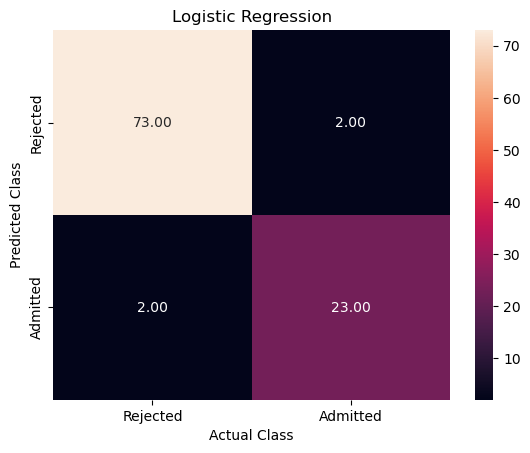

In [46]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pp, y_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test_pp))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test_pp)))

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = lr.predict(X_test_pp)
lr_confm = confusion_matrix(y_test_pred, y_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Rejected","Admitted"] , yticklabels = ["Rejected" , "Admitted"] )
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

In [47]:
pd.DataFrame(y_test).value_counts()

0    75
1    25
dtype: int64

## Random Forest Classification

Random Forest Accuracy: 0.950
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.92      0.88      0.90        25

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.95      0.95      0.95       100



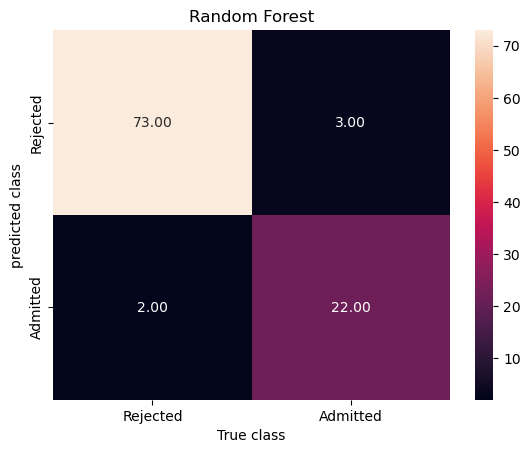

CPU times: total: 422 ms
Wall time: 427 ms


In [48]:
%%time
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_pp, y_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test_pp))))
print('--------------------------------------')
print(classification_report(y_test, rf.predict(X_test_pp)))

rf_confm = confusion_matrix(rf.predict(X_test_pp), y_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Rejected","Admitted"] , yticklabels = ["Rejected","Admitted"] )
plt.ylabel('predicted class')
plt.xlabel('True class')
plt.title('Random Forest')
plt.show()

## Support Vector Classification

Support Vector Machine Accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.92      0.92      0.92        25

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



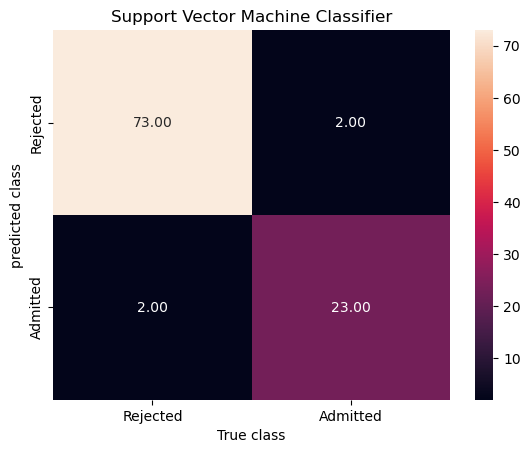

In [49]:
# Fitting SVC Classfier model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_pp, y_train)

# Printing accuracy score & confusion matrix
print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test_pp))))
print('--------------------------------------')
print(classification_report(y_test, svc.predict(X_test_pp)))

svc_confm = confusion_matrix(svc.predict(X_test_pp), y_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Rejected","Admitted"] , yticklabels = ["Rejected","Admitted"] )
plt.ylabel('predicted class')
plt.xlabel('True class')
plt.title('Support Vector Machine Classifier')
plt.show()

## Gradient Boosting Classification

Gradient Boosting Classifier Accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.96      0.88      0.92        25

    accuracy                           0.96       100
   macro avg       0.96      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100



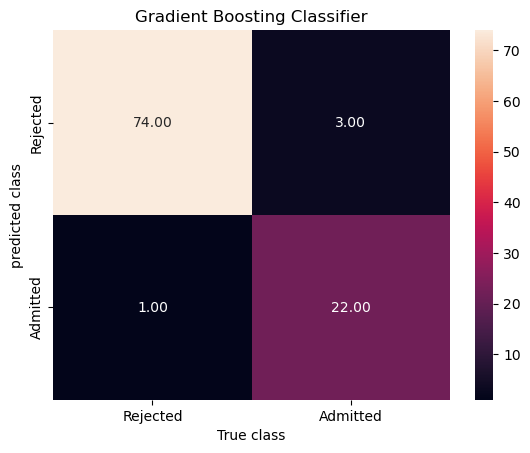

CPU times: total: 234 ms
Wall time: 244 ms


In [50]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_pp, y_train)

# Printing accuracy score & confusion matrix
print('Gradient Boosting Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, gbc.predict(X_test_pp))))
print('--------------------------------------')
print(classification_report(y_test, gbc.predict(X_test_pp)))

gbc_confm = confusion_matrix(gbc.predict(X_test_pp), y_test)
sns.heatmap(gbc_confm, annot=True, fmt='.2f',xticklabels = ["Rejected","Admitted"] , yticklabels = ["Rejected","Admitted"] )
plt.ylabel('predicted class')
plt.xlabel('True class')
plt.title('Gradient Boosting Classifier')
plt.show()

### Since the GradientBoostingClassifier has 96% accuracy we will choose it to be our BEST_MODEL.
### Also the precision is consistently at 96% for this model and lower for other models and since our Producer's Risk is the main concern here ; hence Higher Precision  becomes a  necessity.
### Plus, this model is also taking lesser execution time

In [51]:
f_imp=pd.Series(gbc.feature_importances_,index=st_train_set.drop(['admit','Chance of Admit '],axis = 1).columns).sort_values(ascending=False)
print(f_imp)

CGPA                 0.867498
GRE Score            0.050161
TOEFL Score          0.026341
SOP                  0.025127
University Rating    0.017241
LOR                  0.011229
Research             0.002402
dtype: float64


#### According to the ML Model CGPA is the feature which is most important admission deciding factor  and Research is the least important. The Model we have devised has a 96% accuracy and precision on a TEST DATA. Hence we are 96% sure about all this